Shape of X: (9120, 5625)
Shape of y: (9120,)
Standardisation complete.
Scaled shape: (9120, 5625)
PCA complete.
Reduced shape: (9120, 50)
Models trained successfully!
KNN Accuracy: 0.956140350877193
SVM Accuracy: 0.9857456140350878
Decision Tree Accuracy: 0.9205043859649122


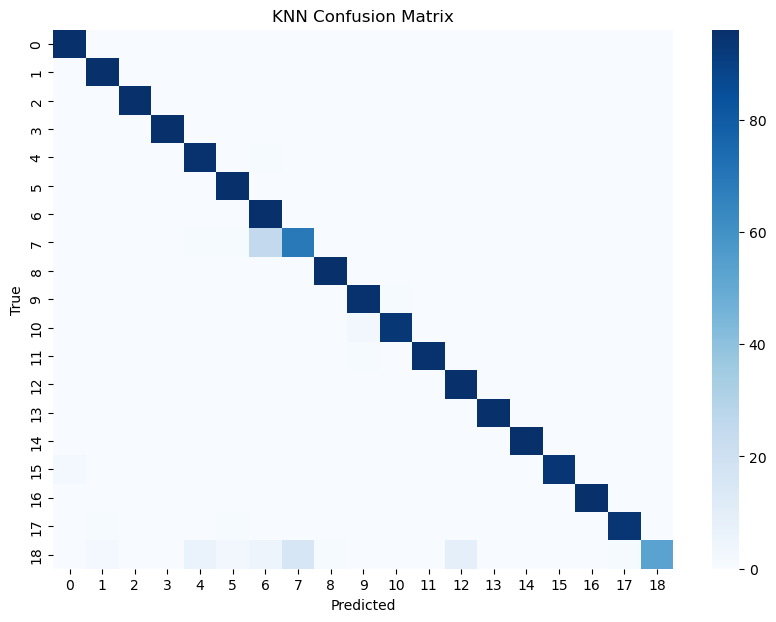

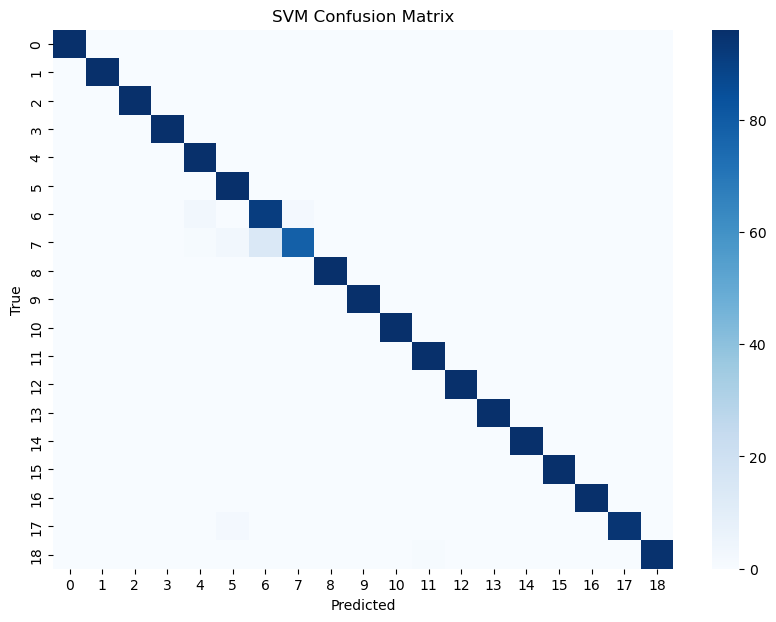

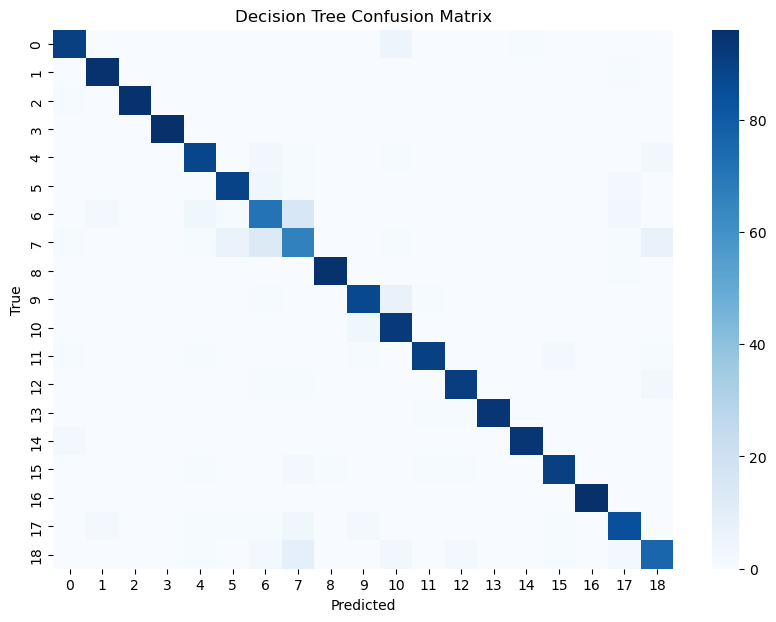

In [1]:
# APPENDIX A — Loading and Converting the DSADS Dataset
import os
import numpy as np

base_path = "data"

X = []
y = []

for activity_folder in sorted(os.listdir(base_path)):
    activity_path = os.path.join(base_path, activity_folder)
    if not os.path.isdir(activity_path):
        continue

    label = int(activity_folder[1:])   # a01 → 1

    for participant_folder in sorted(os.listdir(activity_path)):
        participant_path = os.path.join(activity_path, participant_folder)

        for file in sorted(os.listdir(participant_path)):
            file_path = os.path.join(participant_path, file)

            # FIXED: Files use comma-separated data
            data = np.loadtxt(file_path, delimiter=",")

            # Flatten 125×45 → 5625 vector
            X.append(data.reshape(-1))
            y.append(label)

X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.int32)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# APPENDIX B — Standardisation (Normalisation)
# Z-score standardisation is applied so all features contribute equally.

# APPENDIX B — Standardisation (Normalisation)
# Z-score standardisation is applied so all features contribute equally.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardisation complete.")
print("Scaled shape:", X_scaled.shape)

# APPENDIX C — PCA for Dimensionality Reduction
# Reducing 5625 features to 50 principal components.

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print("PCA complete.")
print("Reduced shape:", X_pca.shape)
# APPENDIX D — Train–Test Split and Training Models

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Train-test split (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# SVM (RBF Kernel)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

print("Models trained successfully!")

# APPENDIX E — Evaluation and Confusion Matrices

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_cm(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, cmap="Blues", annot=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Accuracy
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test)))
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

# Confusion matrices
plot_cm(knn, X_test, y_test, "KNN Confusion Matrix")
plot_cm(svm, X_test, y_test, "SVM Confusion Matrix")
plot_cm(dt, X_test, y_test, "Decision Tree Confusion Matrix")


